### 공부시간과 과외횟수에 따른 점수 예측하기
- 목표 : 공부시간과 과외횟수가 가지는 패턴/규칙을 찾아서 점수를 예측
- 데이터셋 : 임의의 생성
- 피쳐/속성 : 공부 시간, 과외횟수
- 타겟/라벨 : 점수
- 학습 방법 : 지도학습 > 회귀
- 알고리즘 : 선형회귀 <== [조건] 데이터의 분포가 선형 분포여야 함

[1] 데이터 준비

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [23]:
# 임의의 데이터
hour = [1, 3, 4, 5, 7, 9, 10]
lesson = [0, 0, 2, 1, 2, 0, 1]
jumsu = [32, 55, 83, 70, 99, 92, 100]

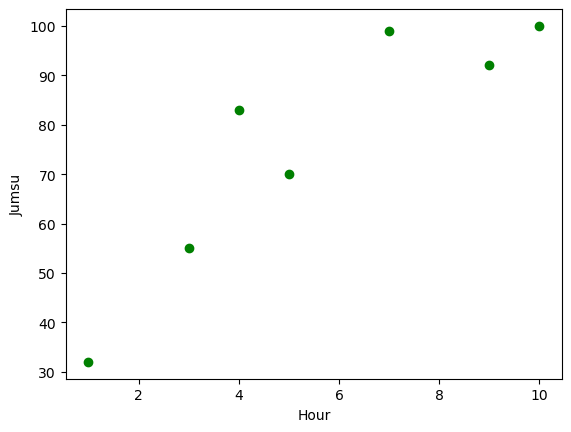

In [25]:
# 현재 데이터의 분포 확인
plt.plot(hour, jumsu, 'go')
plt.xlabel('Hour')
plt.ylabel('Jumsu')
plt.show()

In [27]:
dataDF = pd.DataFrame({'Hour' : hour, 'Lesson' : lesson})
jumsuSR = pd.Series(jumsu)

[2] 학습 진행 - 다중 선형 회귀

In [30]:
# 모듈 인스턴스 생성
model = LinearRegression()

# 학습 진행 => coef_, intercept_
model.fit(dataDF, jumsuSR)

LinearRegression()

In [32]:
# 모델 파라미터 => 피쳐가 2개 => coef_ 2개
print(f"model.coef_ : {len(model.coef_)}개, {model.coef_}")
print(f"model.intercept_ : {model.intercept_}")

model.coef_ : 2개, [ 6.27924892 11.61819933]
model.intercept_ : 30.91429947039


[3] 모델 성능 평가

In [33]:
# 점수 => 내부에서 predict()진행 => 결과로 R2 추출해서 반환
score = model.score(dataDF, jumsuSR)
print(f"score : {score}")

score : 0.9649627963178466


In [41]:
# 성능지표 => 오차계산과 결정계수 계싼
pre_jumsu = model.predict(dataDF)

# 손실/비용 계산 함수 => 정답과 예측값 : 0에 가까울 수록 좋음
mse = mean_squared_error(jumsuSR, pre_jumsu)
rmse = mean_squared_error(jumsuSR, pre_jumsu, squared = False)
mae = mean_absolute_error(jumsuSR, pre_jumsu)

# 얼마나 정답에 가깝게 값을 예측 했느냐를 나타내는 지표 => 정답과 예측값 제공 : 1에 가까울 수록 좋음
r2 = r2_score(jumsuSR, pre_jumsu)

In [42]:
# 손실/비용함수 값은 0에 가까울 수록
# 결정계수 값은 1에 가까울 수록 성능 좋은 모델
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"mae : {mae}")
print(f"r2 : {r2}")

mse : 19.134603480294377
rmse : 4.3743117721870695
mae : 4.127794208680102
r2 : 0.9649627963178466


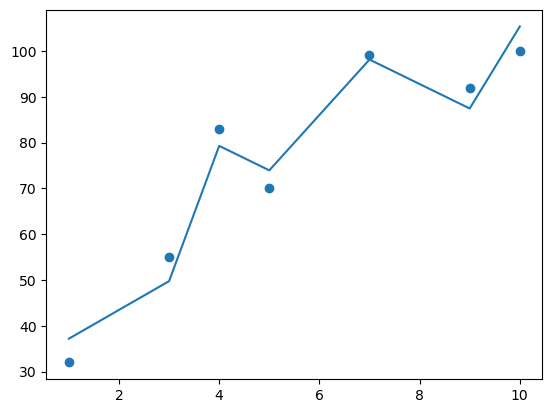

In [39]:
plt.plot(hour, pre_jumsu)
plt.scatter(hour, jumsu)
plt.show()